![Image header](Fraud%20Image.png)

**Authors:** Janet Atunga, Colins Wanjao, Anita Bosibori, Ruth Kamau, Bernard Kinyua, Joyleen Cherono

**Date Created:** 06-02-2024

**Discipline:** DS-PT05

<h1 style="background-color: #cfe2f3; padding: 10px; color: black;"><b>Leveraging Machine Learning For Credit Card Fraud Detection</b></h1>

## Executive Summary

## Business Problem

## Data Understanding

In [21]:
# Import Standard Libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns


# Import classifier libraries

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Other libraries

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")



### Loading and Inspecting Data Set

In [30]:
df = pd.read_csv('creditcardFraud.csv', index_col=0)

In [31]:
# Previewing the dataset

df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
60980,49591.0,-1.078058,0.472978,0.872587,-1.693499,-0.473819,-1.394841,0.390493,0.208516,-1.746987,...,-0.077302,-0.601560,0.095988,0.334340,0.093190,-0.666101,0.158345,0.063077,56.0,0
259679,159224.0,0.140654,0.614854,-0.811093,0.210524,1.090949,-1.436960,1.488835,-0.521849,-0.448717,...,0.364569,1.180486,-0.027099,0.042148,-0.693194,-0.117583,0.242936,0.270430,49.0,0
102727,68332.0,1.492525,-0.937371,0.733062,-1.341682,-1.638440,-0.891609,-1.008324,-0.229074,-1.878821,...,-0.355095,-0.638729,0.164058,0.365213,0.160463,-0.414044,0.047972,0.032811,18.6,0
239078,149947.0,-0.239639,1.464496,-1.486780,-0.021256,-0.058483,-1.380374,0.262271,0.503499,-0.224797,...,0.371395,0.894852,-0.052035,-0.185209,-0.244038,-0.152268,-0.322308,-0.117872,22.5,0
152955,97655.0,2.067000,0.396577,-2.528664,0.231966,1.029264,-1.260592,0.644661,-0.469112,1.178047,...,-0.015175,0.257566,-0.031586,0.653762,0.392559,0.145512,-0.109600,-0.058973,16.0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 60980 to 271634
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    80000 non-null  float64
 1   V1      80000 non-null  float64
 2   V2      80000 non-null  float64
 3   V3      80000 non-null  float64
 4   V4      80000 non-null  float64
 5   V5      80000 non-null  float64
 6   V6      80000 non-null  float64
 7   V7      80000 non-null  float64
 8   V8      80000 non-null  float64
 9   V9      80000 non-null  float64
 10  V10     80000 non-null  float64
 11  V11     80000 non-null  float64
 12  V12     80000 non-null  float64
 13  V13     80000 non-null  float64
 14  V14     80000 non-null  float64
 15  V15     80000 non-null  float64
 16  V16     80000 non-null  float64
 17  V17     80000 non-null  float64
 18  V18     80000 non-null  float64
 19  V19     80000 non-null  float64
 20  V20     80000 non-null  float64
 21  V21     80000 non-null  float6

In [20]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [52]:
# Count and normalize non-fraudulent transactions
non_fraud_count = df['Class'].value_counts()[0]
non_fraud_percentage = df['Class'].value_counts(normalize=True)[0]

# Count and normalize fraudulent transactions
fraud_count = df['Class'].value_counts()[1]
fraud_percentage = df['Class'].value_counts(normalize=True)[1]

# Render the results
print("Non-Fraudulent Transactions: {:,} ({:.2%})".format(non_fraud_count, non_fraud_percentage))
print("Fraudulent Transactions: {:,} ({:.2%})".format(fraud_count, fraud_percentage))


Non-Fraudulent Transactions: 79,881 (99.85%)
Fraudulent Transactions: 119 (0.15%)


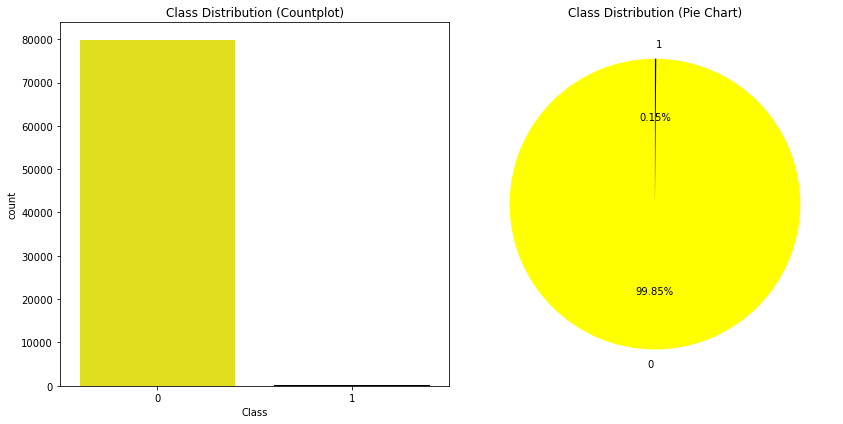

In [56]:

# custom colors for the plot
colors = ['#FFFF00', '#000000']

# Create subplots with two plots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot countplot
sns.countplot('Class', data=df, palette=colors, ax=axs[0])
axs[0].set_title('Class Distribution (Countplot)')

# Plot pie chart
class_counts = df['Class'].value_counts()
axs[1].pie(class_counts, labels=class_counts.index, autopct='%1.2f%%', colors=colors, startangle=90)
axs[1].set_title('Class Distribution (Pie Chart)')

plt.tight_layout()
plt.show()


(1.0, 172792.0)

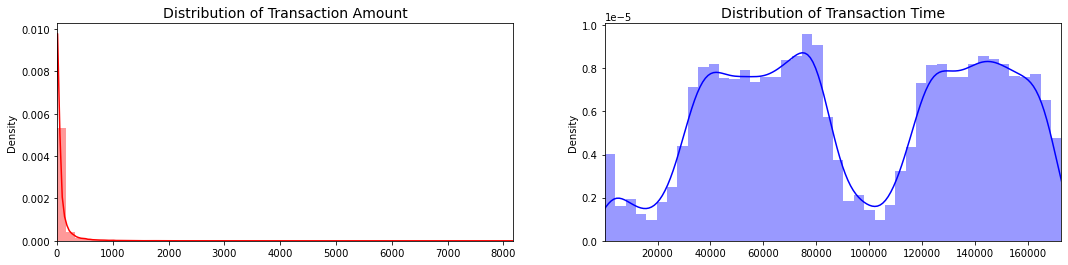

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

## Feature Selection

### `ANOVA TEST (using Sklearn Library)`

In [48]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features (X) and target variable (y)
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable

# Initialize SelectKBest with f_classif scoring function
selector = SelectKBest(score_func=f_classif)

# Fit selector to the data
selector.fit(X, y)

# Get selected features
selected_features = X.columns[selector.get_support()]

# Print selected features
print("Selected Features:", selected_features)


Selected Features: Index(['V1', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'], dtype='object')
